In [55]:
import pickle
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import sys
import os

In [56]:
sys.path.append('../utils')
pickles_dir = os.path.abspath('../pickles')

In [57]:
%load_ext autoreload
%autoreload 2
from DefinitionUtils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
with open(os.path.join(pickles_dir, 'mols.pkl'), 'rb') as f:
    mols_G = pickle.load(f)

In [59]:
tmp = mols_G[0][1]
tmp.nodes(data=True)

NodeDataView({'gg100000': {'type': 'root', 'label': '100000'}, 'gg100001': {'type': 'and', 'label': 'and'}, 'gg100002': {'type': 'sym', 'label': '2'}, 'gh1200': {'type': 'sub', 'label': '1200'}, 'gh1201': {'type': 'and', 'label': 'and'}, 'gh1202': {'type': 'sym', 'label': '16'}, 'gh1203': {'type': 'sym', 'label': '20'}, 'gh1204': {'type': 'sym', 'label': '18'}, 'h200': {'type': 'sub', 'label': '200'}, 'h201': {'type': 'and', 'label': 'and'}, 'h202': {'type': 'sym', 'label': '8'}, 'h203': {'type': 'sym', 'label': '20'}})

In [60]:
tmp_dict = {v: v for i, v in enumerate(tmp.nodes())}

In [61]:
tmp_dict

{'gg100000': 'gg100000',
 'gg100001': 'gg100001',
 'gg100002': 'gg100002',
 'gh1200': 'gh1200',
 'gh1201': 'gh1201',
 'gh1202': 'gh1202',
 'gh1203': 'gh1203',
 'gh1204': 'gh1204',
 'h200': 'h200',
 'h201': 'h201',
 'h202': 'h202',
 'h203': 'h203'}

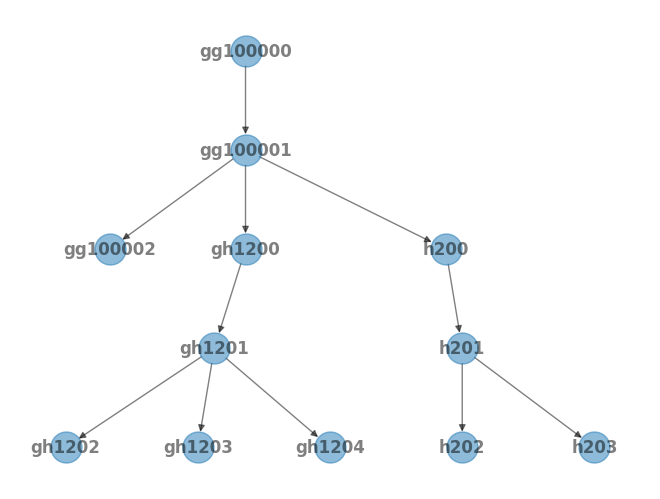

In [62]:
pos = graphviz_layout(tmp, prog="dot")
labels = tmp_dict
nx.draw(tmp, pos=pos,
    node_size=500, labels= labels,alpha=0.5, font_weight="bold", arrows=True)
# tady se generují kompozice

In [63]:
dic_all = {}
mol_keys_dic = {}
mol_final_id_dic = {}
last_id_lower, last_id_upper = 10000,100000
for mol in mols_G.items():
    id, m = mol
    l, this_G = m
    dic_all, lsts,last_id_lower, last_id_upper,sym_id = get_mol_info(this_G, dic_all,last_id_lower+1, last_id_upper+1)
    mol_final_id_dic[id] = sym_id
    mol_keys_dic[id] = lsts


In [64]:
len(dic_all)

226

In [65]:
rewriten_dic_all = rewrite_dict(dic_all)
rewriten_dic_all

{(18, 20): ((18, 20), 10003),
 (16, 20): ((16, 20), 10005),
 (16, 18): ((16, 18), 10007),
 ((16,), (18, 20)): ((16, 10003), 10008),
 ((16, 20), (18,)): ((10005, 18), 10008),
 ((16, 18), (20,)): ((10007, 20), 10008),
 (8, 20): ((8, 20), 10009),
 (10008, 10009): ((10008, 10009), 100003),
 (2, 10009): ((2, 10009), 100005),
 (2, 10008): ((2, 10008), 100007),
 ((2,), (10008, 10009)): ((2, 100003), 100008),
 ((2, 10009), (10008,)): ((100005, 10008), 100008),
 ((2, 10008), (10009,)): ((100007, 10009), 100008),
 (9, 15): ((9, 15), 10012),
 (7, 15): ((7, 15), 10014),
 (7, 9): ((7, 9), 10016),
 ((7,), (9, 15)): ((7, 10012), 10017),
 ((7, 15), (9,)): ((10014, 9), 10017),
 ((7, 9), (15,)): ((10016, 15), 10017),
 (10009, 10017): ((10009, 10017), 100010),
 (17, 20): ((17, 20), 10020),
 (3, 20): ((3, 20), 10022),
 (3, 17): ((3, 17), 10024),
 ((3,), (17, 20)): ((3, 10020), 10025),
 ((3, 20), (17,)): ((10022, 17), 10025),
 ((3, 17), (20,)): ((10024, 20), 10025),
 (14, 20): ((14, 20), 10027),
 (12, 20):

In [66]:
len(rewriten_dic_all)

226

In [67]:
clean_dic = {k:v for _,(k,v) in rewriten_dic_all.items()}

In [68]:
len(clean_dic)

226

In [69]:
rewritten_mol_keys_dic = {}
for k,v in mol_keys_dic.items():
    mol_dic = {}
    for i in v:
        pre,post = rewriten_dic_all[i]
        mol_dic[pre] = post
    rewritten_mol_keys_dic[k] = mol_dic

In [70]:
len(rewritten_mol_keys_dic[2])

18

In [71]:
len(get_complete_mol_keys(rewritten_mol_keys_dic[2],clean_dic))

18

In [72]:
complete_mol_keys_dic = {}
for k,v in rewritten_mol_keys_dic.items():
    complete_mol_keys_dic[k] = {'final_sym':mol_final_id_dic[k],
        'molecule_rules':get_complete_mol_keys(rewritten_mol_keys_dic[k],clean_dic)}
print(len(complete_mol_keys_dic[2]))
complete_mol_keys_dic[2]

2


{'final_sym': 100018,
 'molecule_rules': {(17, 20): 10020,
  (3, 10020): 10025,
  (3, 20): 10022,
  (10022, 17): 10025,
  (3, 17): 10024,
  (10024, 20): 10025,
  (14, 20): 10027,
  (12, 10027): 10032,
  (12, 20): 10029,
  (10029, 14): 10032,
  (12, 14): 10031,
  (10031, 20): 10032,
  (10025, 10032): 100013,
  (14, 100013): 100018,
  (14, 10032): 100015,
  (100015, 10025): 100018,
  (14, 10025): 100017,
  (100017, 10032): 100018}}

In [73]:
test_dic = {}
for k,v in complete_mol_keys_dic.items():
    v = v['molecule_rules']
    for k1,v1 in v.items():
        if k1 in test_dic:
            assert test_dic[k1] == v1
        test_dic[k1] = v1
assert test_dic == clean_dic

In [74]:
len('č')

1

In [75]:
complete_mol_keys_dic[2]

{'final_sym': 100018,
 'molecule_rules': {(17, 20): 10020,
  (3, 10020): 10025,
  (3, 20): 10022,
  (10022, 17): 10025,
  (3, 17): 10024,
  (10024, 20): 10025,
  (14, 20): 10027,
  (12, 10027): 10032,
  (12, 20): 10029,
  (10029, 14): 10032,
  (12, 14): 10031,
  (10031, 20): 10032,
  (10025, 10032): 100013,
  (14, 100013): 100018,
  (14, 10032): 100015,
  (100015, 10025): 100018,
  (14, 10025): 100017,
  (100017, 10032): 100018}}

In [76]:
with open(os.path.join(pickles_dir, "definition_dic.pkl"), "wb") as file:
    pickle.dump({'all_dic':clean_dic,'mol_keys_dic':complete_mol_keys_dic},file)

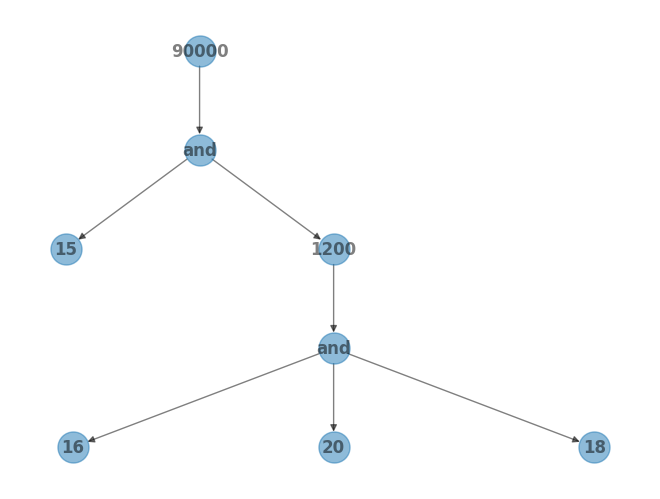

In [77]:
G = mols_G[25][1]
pos = graphviz_layout(G, prog="dot")
labels = nx.get_node_attributes(G, "label")
nx.draw(G, pos=pos,with_labels=True,labels=labels,
    node_size=500,alpha=0.5, font_weight="bold", arrows=True)

In [78]:
list(sorted(map(lambda x: (len(x[1]),x[0]),mol_keys_dic.items())))

[(1, 3),
 (1, 7),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 16),
 (1, 18),
 (1, 23),
 (1, 28),
 (1, 44),
 (1, 48),
 (2, 8),
 (2, 9),
 (2, 11),
 (2, 22),
 (2, 25),
 (2, 35),
 (2, 37),
 (2, 39),
 (2, 47),
 (3, 32),
 (6, 4),
 (6, 6),
 (6, 24),
 (6, 29),
 (6, 41),
 (7, 10),
 (7, 15),
 (7, 17),
 (7, 21),
 (7, 33),
 (7, 34),
 (7, 36),
 (7, 40),
 (7, 42),
 (7, 43),
 (7, 46),
 (7, 49),
 (8, 1),
 (8, 19),
 (8, 20),
 (8, 26),
 (9, 45),
 (12, 30),
 (12, 31),
 (12, 38),
 (13, 0),
 (13, 27),
 (18, 2),
 (18, 5)]

In [79]:
mols_G[3]

([None], <networkx.classes.digraph.DiGraph at 0x1f88bf53e88>)